<a href="https://colab.research.google.com/github/jonash-chataut/heart-attack-prediction-using-ai-model/blob/main/Heart_Failure_Prediction_ml_with_somegiven_data_aswell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Heart Failure Prediction**
---
####ML workshop assignment
Summited by -> **Jonash Chataut**<br>
###### *Bsc.CSIT(4th sem)*
---


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from google.colab import userdata
import os

In [ ]:
# Importing data from kaggle
from google.colab import userdata
key= userdata.get('kaggle_key')
name= userdata.get('kaggle_username')

In [ ]:
# Set Kaggle credentials
os.environ["KAGGLE_USERNAME"] = userdata.get('kaggle_username')
os.environ["KAGGLE_KEY"] = userdata.get('kaggle_key')

# Download and unzip dataset
!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip -o heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


---
## Data Analysing and Preprocessing

---

In [ ]:
# load data
dataset = pd.read_csv("heart.csv")
# Shape of dataset
print("Data shape: ")
print(dataset.shape)
print("\nTop 10 rows: ")
print(dataset.head(10))



Data shape: 
(918, 12)

Top 10 rows: 
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N   

In [ ]:
print("\n Data type and nulls: ")
print(dataset.info())



 Data type and nulls: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
print("\nDataset statistics: ")
print(dataset.describe())



Dataset statistics: 
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [ ]:
print("\nNull values: ")
print(dataset.isnull().sum())
print("\nDuplicate rows: ")
print(dataset.duplicated().sum())
# dataset_header= dataset.columns.to_list()
# print(dataset_header)


Null values: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Duplicate rows: 
0


In [ ]:
# Checking the zeros in the dataset
zero_in_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Age']

for col in zero_in_cols:
    n_zeros = (dataset[col] == 0).sum()
    print(f"{col}: {n_zeros} zeros")

RestingBP: 1 zeros
Cholesterol: 172 zeros
MaxHR: 0 zeros
Age: 0 zeros


In [ ]:
z_cols = ['RestingBP', 'Cholesterol']   # Cols with zero

#Replacing zeros with NaN
dataset_cleaned = dataset.copy()
dataset_cleaned[z_cols] = dataset_cleaned[z_cols].replace(0, np.nan)

# Filling in missing values using median from imputer
dataset_cleaned.fillna(dataset_cleaned.median(numeric_only=True), inplace = True)
print("Checking zeros again after cleaning")
print(dataset_cleaned.isnull().sum())

Checking zeros again after cleaning
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


---
#### Data spiliting and scaling
>Separating data into target and predict<br>
>Scaling the data with standard scaler <br>
---

In [ ]:
# Data spiliting and scaling
X = dataset_cleaned.drop("HeartDisease", axis=1)
y = dataset_cleaned["HeartDisease"]

# one hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test data split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


---
### Data training

> Observing accuracies and classification report using models<br>

---
### Logistics Regression model
---

In [ ]:
# Logistic regression
lf_model = LogisticRegression(max_iter=1000, random_state=42)
lf_model.fit(X_train_scaled, y_train)

# Predicting model on test set with LR
lf_pred = lf_model.predict(X_test_scaled)

print("Logistic Regression->\n")
print(f"Accuracy: {accuracy_score(y_test, lf_pred):.3f}")
print("Classification Report:\n", classification_report(y_test, lf_pred))


Logistic Regression->

Accuracy: 0.891
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



---
### Random Forest model
---

In [ ]:
# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting model on test set using rf
rf_pred = rf_model.predict(X_test)

print("Random Forest->\n")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest->

Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



---
### Visualization of the data

> Ploting confusion matrix<br>
> Ploting Receiver Operating Characteristic (ROC) curve
---

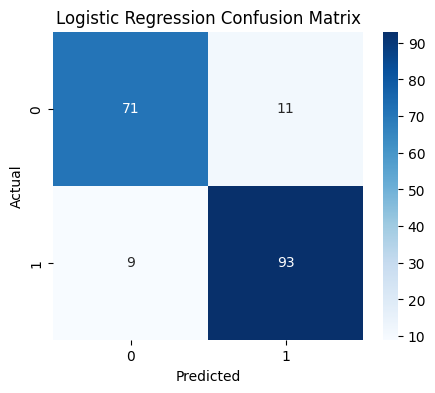

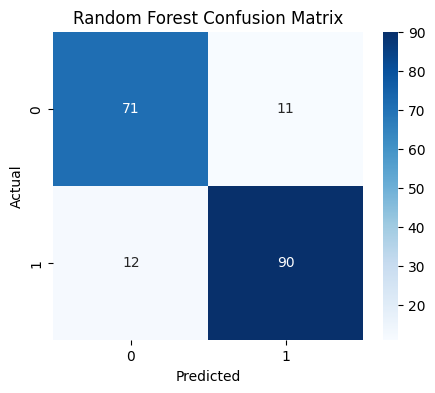

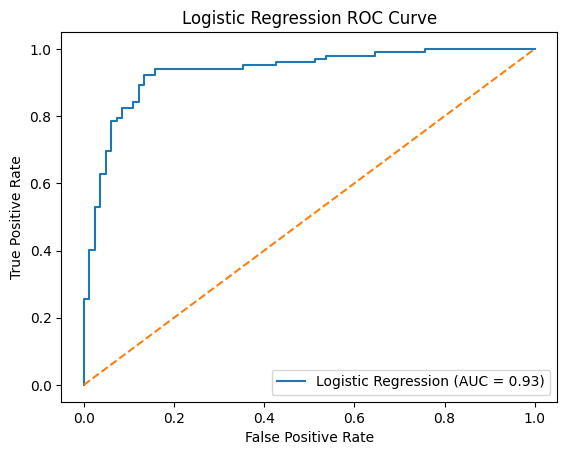

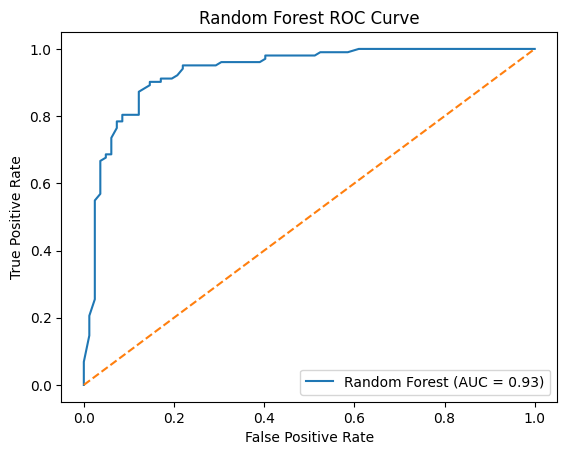

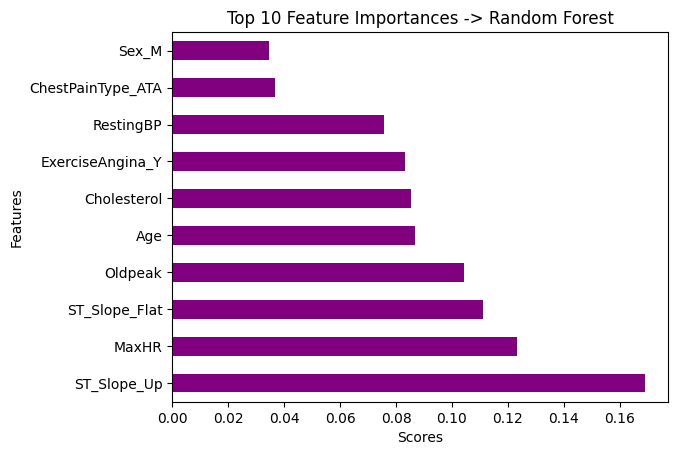

In [ ]:
# method for ploting confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# method for ploting roc curve
def plot_roc_curve(model, X_test, y_test, model_name="Model"):
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Data ploting by method calling
# Confusion matrix
plot_confusion_matrix(lf_model, X_test_scaled, y_test, "Logistic Regression")
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")

# Roc curve
plot_roc_curve(lf_model, X_test_scaled, y_test, "Logistic Regression")
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")

# Ploting the top 10 features that affect the model most using random forest
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', color='purple')
plt.title('Top 10 Feature Importances -> Random Forest')
plt.xlabel("Scores")
plt.ylabel("Features")
plt.show()




---
### Checking the model on my own datasets for more understanding and testings
---

In [ ]:
# function for prediction on given data
def prediction_for_own(input_data, input_cols, model, scaler=None):
  inp_df = pd.DataFrame(input_data, columns=input_cols)
  # to check scaler is or not for input in lr and rf
  if scaler:
    inp_df_scaled = scaler.transform(inp_df) #for lr
  else:
    inp_df_scaled = inp_df #for rf

  predict_out = model.predict(inp_df_scaled)
  proba = model.predict_proba(inp_df_scaled)
  print(f"Heart disease: {predict_out}\nProbability of no heart disease: {proba[0][0]}\nProbability of heart disease: {proba[0][1]}\n")

# getting the columns of trained X table for our inputs
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head(10)
X_cols = X_train_scaled_df.columns.to_list()

# random data
ran_data = [[54, 130, 250, 0, 160, 1.5, 1, 0, 1, 0, 1, 0, 0, 1, 0]]
# data having risk of heart disease
risk_data = [[65, 150, 300, 1, 110, 3.0, 1, 0, 0, 1, 0, 1, 1, 1, 0]]
# data of a normal person
norm_data = [[45, 120, 180, 0, 170, 0.0, 0, 1, 0, 0, 1, 0, 0, 0, 1]]

print("-> For a sample random data:\n")
print("Logistic Regression:\n")
prediction_for_own(ran_data, X_cols,lf_model,scaler)
print("Random forest:\n")
prediction_for_own(ran_data, X_cols,rf_model)

print("-> For data of person with risk of heart disease:\n")
print("Logistic Regression:\n")
prediction_for_own(risk_data, X_cols,lf_model,scaler)
print("Random forest:\n")
prediction_for_own(risk_data, X_cols,rf_model)
print("-> For data of normal person:\n")
print("Logistic Regression:\n")
prediction_for_own(norm_data, X_cols,lf_model,scaler)
print("Random forest:\n")
prediction_for_own(norm_data, X_cols,rf_model)


-> For a sample random data:

Logistic Regression:

Heart disease: [0]
Probability of no heart disease: 0.5174621591324207
Probability of heart disease: 0.4825378408675794

Random forest:

Heart disease: [0]
Probability of no heart disease: 0.62
Probability of heart disease: 0.38

-> For data of person with risk of heart disease:

Logistic Regression:

Heart disease: [1]
Probability of no heart disease: 0.03272759295573224
Probability of heart disease: 0.9672724070442678

Random forest:

Heart disease: [1]
Probability of no heart disease: 0.13
Probability of heart disease: 0.87

-> For data of normal person:

Logistic Regression:

Heart disease: [0]
Probability of no heart disease: 0.9879064692487853
Probability of heart disease: 0.012093530751214708

Random forest:

Heart disease: [0]
Probability of no heart disease: 1.0
Probability of heart disease: 0.0



---
##### End of the assignment
---